
# **Data Description**

The dataset selected for this project is sourced from the Therapeutic Target Database, a publicly available database that provides information on chemical compounds with potential therapeutic effects. This comprehensive database includes details on therapeutic targets, encompassing enzymes, receptors, and structural proteins associated with a range of diseases such as cancer, neurologic diseases, metabolic diseases, and others. The information within this database serves various purposes, including facilitating drug design with the aim of achieving positive therapeutic outcomes.

The Therapeutic Target Database is an extensive collection of data available in the form of smaller, more focused subsets. One such subset is the "Biomarker to disease mapping with ICD identifiers." This particular subset specifically focuses on the relationship between biomarkers and diseases, along with their identification symbols. Biomarkers refer to specific biological characteristics, such as proteins, genes, or other factors, that can be measured within the body and serve as indicators of health or disease. The dataset includes the biomarker's identifier and name, as well as the associated disease's name and disease identifier derived from the last three versions of the International Classification of Diseases (ICD).

# Import packages, read and present raw data

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


In [80]:
data = pd.read_csv('csv/P1-08-Biomarker_disease.txt', delimiter='\t')
display(data)

,BiomarkerID,Biomarker_Name,Diseasename,ICD11,ICD10,ICD9
0,BM003549,Neutrophil gelatinase-associated lipocalin (LCN2),Smallpox,ICD-11: 1E70,ICD-10: B03,.
1,BM002188,Monocyte chemoattractantprotein-1 (MCP-1),Amyotrophic lateral sclerosis,ICD-11: 8B60.0,.,ICD-9: 335.2
2,BM001695,"HLA class I histocompatibility antigen, B-8 al...",Myasthenia gravis,ICD-11: 8C6Y,ICD-10: G70.0,ICD-9: 358
3,BM000711,Muscle-specific kinase (MuSK) antibody,Myasthenia gravis,ICD-11: 8C6Y,ICD-10: G70.0,ICD-9: 358
4,BM002220,Muscle-specific kinase (MuSK) antibody,Myasthenia gravis,ICD-11: 8C6Y,ICD-10: G70.0,ICD-9: 358
...,...,...,...,...,...,...
2507,BM003242,von Willebrand factor (VWF),Dengue,ICD-11: 1D20-1D2Z,"ICD-10: A90, R50",.
2508,BM002995,von Willebrand factor (VWF),Peripheral arterial disease,ICD-11: BD4Z,"ICD-10: I73, I73.9",ICD-9: 443
2509,BM002998,von Willebrand factor (VWF),Osteoarthritis,ICD-11: FA00-FA05,.,ICD-9: 715
2510,BM000050,Wnt-5a protein (WNT5A),Breast cancer,ICD-11: 2C60-2C65,ICD-10: C50,.


In [81]:
# Display summary statistics.
display(data.describe())

,BiomarkerID,Biomarker_Name,Diseasename,ICD11,ICD10,ICD9
count,2512,2512,2512,2512,2512,2512
unique,2512,1318,167,145,83,90
top,BM003549,Interleukin-6 (IL6),Parkinson disease,ICD-11: 8A00.0,.,.
freq,1,48,153,153,1143,1041


# **Justification for the property I you would like the model to predict**

In this analysis, an attempt will be made to predict the type of disease on the basis of an associated biomarker. In such a task, the name of the disease is at the same time the category to which biomarkers with a unique ID should be assigned. This task may prove difficult due to the large number of different categories (167) may affect the quality of the predictions.

# **Cleaning the data, linking datasets**

Since the data is stored in a txt file and the individual columns are separated by a tab character, the appropriate delimiter was used when reading the data from the file, using the pandas.read_csv() function. Apart from this, no further cleaning of the dataset was necessary. 

# **Choose and train Estimator and Evaluate model**

A sequential neural network model with two dense layers with ReLU activation functions and a final dense layer with a softmax activation function will be used first, as it can be used for the classification we are dealing with here, and then its performance will be compared with other models to find the best one.

In [82]:
# Convert variables to numerical values so that they can be used as input to the model
X = pd.get_dummies(data.drop('Diseasename', axis=1))
y = pd.get_dummies(data['Diseasename'])

# Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features to have mean=0 and variance=1 to improve stability and speed of the training process
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network and compile the model
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store history to be plotted
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model's performance
loss, accuracy = model.evaluate(X_test, y_test)
print("Model accuracy:", accuracy)


Epoch 1/50
63/63 [==============================] - 8s 47ms/step - loss: 4.9416 - accuracy: 0.0413 - val_loss: 4.3684 - val_accuracy: 0.0954
Epoch 2/50
63/63 [==============================] - 2s 26ms/step - loss: 3.6974 - accuracy: 0.1901 - val_loss: 3.0559 - val_accuracy: 0.2763
Epoch 3/50
63/63 [==============================] - 1s 23ms/step - loss: 2.4723 - accuracy: 0.4171 - val_loss: 2.1798 - val_accuracy: 0.4990
Epoch 4/50
63/63 [==============================] - 2s 32ms/step - loss: 1.5729 - accuracy: 0.6690 - val_loss: 1.5819 - val_accuracy: 0.6541
Epoch 5/50
63/63 [==============================] - 2s 25ms/step - loss: 1.0108 - accuracy: 0.7934 - val_loss: 1.2859 - val_accuracy: 0.7416
Epoch 6/50
63/63 [==============================] - 2s 24ms/step - loss: 0.6813 - accuracy: 0.8706 - val_loss: 1.1163 - val_accuracy: 0.7853
Epoch 7/50
63/63 [==============================] - 2s 27ms/step - loss: 0.4798 - accuracy: 0.9094 - val_loss: 1.0169 - val_accuracy: 0.8012
Epoch 8/50
63

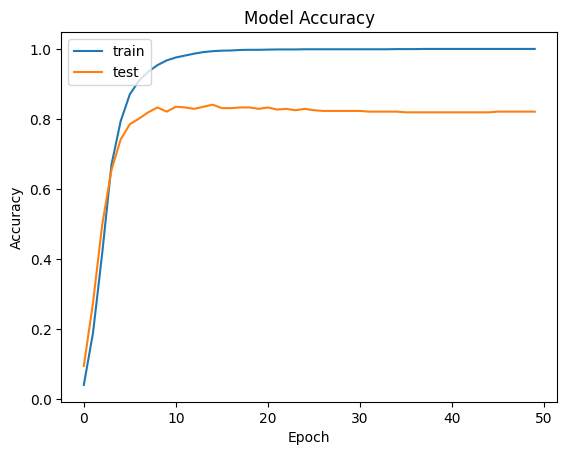

In [83]:
# Plot the accuracy over the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The model improves for the first ten epochs and then stabilises at just over 80 per cent, which could mean that the model has learned to capture the important patterns in the training data and generalize well to the validation data. An accuracy of 81.1% is decent but it is to be expected that a different model might have produced a slightly better result.

Additional models will therefore now be applied and the results compared. The most suitable for this type of data will be the use of classification models for labelled data, and the following shows the use of these models and outputs the accuracy of each.

# KNeighbors Classifier

In [84]:
X = pd.get_dummies(data.drop('Diseasename', axis=1))
y = data['Diseasename']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy: ", accuracy)

Model accuracy:  0.705765407554672


# SGD Classifier

In [85]:
X = pd.get_dummies(data.drop('Diseasename', axis=1))
y = data['Diseasename']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy: ", accuracy)

Model accuracy:  0.9662027833001988


# Naive Bayes

In [86]:
X = pd.get_dummies(data.drop('Diseasename', axis=1))
y = data['Diseasename']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy: ", accuracy)

Model accuracy:  0.8489065606361829


# SVC

In [87]:
X = pd.get_dummies(data.drop('Diseasename', axis=1))
y = data['Diseasename']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy: ", accuracy)

Model accuracy:  0.9145129224652088


# Linear SVC

In [88]:
X = pd.get_dummies(data.drop('Diseasename', axis=1))
y = data['Diseasename']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearSVC(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy: ", accuracy)

Model accuracy:  0.974155069582505


# Random Forest Classifier

In [89]:
X = pd.get_dummies(data.drop('Diseasename', axis=1))
y = data['Diseasename']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy: ", accuracy)

Model accuracy:  0.9821073558648111


# **Presentation of results and Conclusions**

In the above analysis, classification models were used to predict which disease might be associated with which biomarker. As we can see, most of the classification models for this dataset performed well or even excellent, with the Random Forest Classifier model being the best. The results could, however, be quite disparate, it therefore appeared reasonable to make predictions using different models in order to find the most accurate result.

A summary of the obtained accuracies for each classification model, from most precise to least precise:
1. Random Forest Classifier, result: 0.9821073558648111
2. Linear SVC, result: 0.974155069582505
3. SGD Classifier, result: 0.9662027833001988
4. SVC, result: 0.9145129224652088
5. Naive Bayes, result: 0.8489065606361829
6. Sequential Neural Network, result: 0.8210735321044922
7. KNeighbors Classifier, result: 0.705765407554672

Dataset source: https://db.idrblab.net/ttd/full-data-download